<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/eda_tarea_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

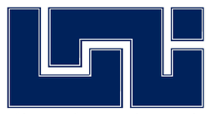

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Iranzuegi López, Luis Ángel
~~~

# **Tarea Modelo no Supervisado**

# <font color="#0A66C2"><h10>**Clustering** <font> 



# **Carga de librerías necesarias**

## <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [ ]:
import pandas as pd
import numpy as np

## <font color="#333F49"> **Para el preprocesado y el modelo** <font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## <font color="#333F49"> **Para gráficos** <font>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt
import seaborn as sns

## <font color="#333F49">**Para las alertas** <font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Análisis Exploratorio de los Datos y Preprocesamiento de Datos**

## <font color="#333F49">**Descripción del set de datos** <font>

El set de datos hace referencia a distintos indicadores de negocio de una cadena de supermercados en una serie de ciudades.

El set de datos, en una primera lectura, viene delimitado, definido por **dos ejes** que no podemos obviar. 

Por un lado, el **eje del tiempo**. En concreto, los datos,observaciones nos situán en los tres primeros meses de 2019.

Y, por otro lado, el **eje cultural** de un país como es Myanmar o Birmania, es decir, nos referimos a los usos, costumbres, valores de esa sociedad y que deben ser tenidos en cuenta en este proceso explotario de los Datos y también en los siguientes pasos y consideraciones de negocio que se extraigan.

[kaggle, ventas supermercados]( https://www.kaggle.com/aungpyaeap/supermarket-sales)

**Objetivo:** 

Definir un modelo que permita detectar patrones, grupos en función de las observaciones recogidas. De este modo, contar con segmentación de los y las clientas de esta cadena de supermercados que pueda ayudarnos en la implementación de campañas u otras acciones que se estimen de interés para la actividad diaria.

El dataframe contiene 17 variables y 1000 observaciones.

Las variables se definen como:
- **Identificación de la factura:** Número de identificación de la factura del comprobante de venta generado por computadora
- **Sucursal:** Sucursal del supercentro (hay 3 sucursales disponibles identificadas como A, B y C)
- **Ciudad:** Ubicación de los supermercados
- **Tipo_cliente:** Tipo de clientes, clientas registradas como: miembros para clientes, clientas que usan tarjeta de miembro ;y, normal para clientes, clientas sin tarjeta de miembro
- **Género:** Género tipo de cliente, clienta
- **Línea_producto:** Categorías de productos generales: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes
- **Precio_unitario:** Precio de cada producto en $
- **Cantidad:** Número de productos comprados por cliente, clienta
- **Impuesto:** Tasa de impuesto del 5% por compra del cliente, clienta
- **Total:** Precio total abonado por los y las clientas con impuestos incluidos
- **Fecha:** Fecha de compra (Registro disponible desde enero de 2019 hasta marzo de 2019)
- **Hora:** Hora de compra (10 a.m. a 9 p.m.)
- **Forma_pago:** Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica)
- **Coste:** Costo de los bienes vendidos
- **Margen_bruto:** Porcentaje de margen
- **Ingreso_bruto:** Ingresos brutos
- **Calificación:** Calificación de estratificación del cliente en su experiencia de compra general (en una escala del 1 al 10) 

In [ ]:
url = 'https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/ventas_supermercado.csv'

In [ ]:
df = pd.read_csv(url)
df

Factura Sucursal     Ciudad  ... Margen_bruto Ingreso_bruto Calificacion
0    750-67-8428        A     Yangon  ...     4.761905       26.1415          9.1
1    226-31-3081        C  Naypyitaw  ...     4.761905        3.8200          9.6
2    631-41-3108        A     Yangon  ...     4.761905       16.2155          7.4
3    123-19-1176        A     Yangon  ...     4.761905       23.2880          8.4
4    373-73-7910        A     Yangon  ...     4.761905       30.2085          5.3
..           ...      ...        ...  ...          ...           ...          ...
995  233-67-5758        C  Naypyitaw  ...     4.761905        2.0175          6.2
996  303-96-2227        B   Mandalay  ...     4.761905       48.6900          4.4
997  727-02-1313        A     Yangon  ...     4.761905        1.5920          7.7
998  347-56-2442        A     Yangon  ...     4.761905        3.2910          4.1
999  849-09-3807        A     Yangon  ...     4.761905       30.9190          6.6

[1000 rows x 17 columns]

In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.size

17000

In [ ]:
df.columns

Index(['Factura', 'Sucursal', 'Ciudad', 'Tipo_cliente', 'Genero',
       'Linea_producto', 'Precio_unidad', 'Cantidad', 'Impuesto', 'Total',
       'Fecha', 'Hora', 'Forma_pago', 'Coste', 'Margen_bruto', 'Ingreso_bruto',
       'Calificacion'],
      dtype='object')

## <font color="#333F49">**Valores únicos por variable** <font>

In [ ]:
df.nunique()

Factura           1000
Sucursal             3
Ciudad               3
Tipo_cliente         2
Genero               2
Linea_producto       6
Precio_unidad      943
Cantidad            10
Impuesto           990
Total              990
Fecha               89
Hora               506
Forma_pago           3
Coste              990
Margen_bruto         1
Ingreso_bruto      990
Calificacion        61
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Factura         1000 non-null   object 
 1   Sucursal        1000 non-null   object 
 2   Ciudad          1000 non-null   object 
 3   Tipo_cliente    1000 non-null   object 
 4   Genero          1000 non-null   object 
 5   Linea_producto  1000 non-null   object 
 6   Precio_unidad   1000 non-null   float64
 7   Cantidad        1000 non-null   int64  
 8   Impuesto        1000 non-null   float64
 9   Total           1000 non-null   float64
 10  Fecha           1000 non-null   object 
 11  Hora            1000 non-null   object 
 12  Forma_pago      1000 non-null   object 
 13  Coste           1000 non-null   float64
 14  Margen_bruto    1000 non-null   float64
 15  Ingreso_bruto   1000 non-null   float64
 16  Calificacion    1000 non-null   float64
dtypes: float64(7), int64(1), object(9)

In [ ]:
df.Factura.unique()

array(['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176',
       '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665',
       '665-32-9167', '692-92-5582', '351-62-0822', '529-56-3974',
       '365-64-0515', '252-56-2699', '829-34-3910', '299-46-1805',
       '656-95-9349', '765-26-6951', '329-62-1586', '319-50-3348',
       '300-71-4605', '371-85-5789', '273-16-6619', '636-48-8204',
       '549-59-1358', '227-03-5010', '649-29-6775', '189-17-4241',
       '145-94-9061', '848-62-7243', '871-79-8483', '149-71-6266',
       '640-49-2076', '595-11-5460', '183-56-6882', '232-16-2483',
       '129-29-8530', '272-65-1806', '333-73-7901', '777-82-7220',
       '280-35-5823', '554-53-8700', '354-25-5821', '228-96-1411',
       '617-15-4209', '132-32-9879', '370-41-7321', '727-46-3608',
       '669-54-1719', '574-22-5561', '326-78-5178', '162-48-8011',
       '616-24-2851', '778-71-5554', '242-55-6721', '399-46-5918',
       '106-35-6779', '635-40-6220', '817-48-8732', '120-06-42

In [ ]:
df.Sucursal.unique()

array(['A', 'C', 'B'], dtype=object)

In [ ]:
df.Sucursal.value_counts()

A    340
B    332
C    328
Name: Sucursal, dtype: int64

In [ ]:
df.Ciudad.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [ ]:
df.Ciudad.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: Ciudad, dtype: int64

In [ ]:
df.Tipo_cliente.unique()

array(['Miembro', 'Normal'], dtype=object)

In [ ]:
df.Tipo_cliente.value_counts()

Miembro    501
Normal     499
Name: Tipo_cliente, dtype: int64

In [ ]:
df.Genero.unique()

array(['Mujer', 'Hombre'], dtype=object)

In [ ]:
df.Genero.value_counts()

Mujer     501
Hombre    499
Name: Genero, dtype: int64

In [ ]:
df.Linea_producto.unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [ ]:
df.Linea_producto.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Linea_producto, dtype: int64

In [ ]:
df.Precio_unidad.unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, 36.26,
       54.84, 14.48, 25.51, 46.95, 43.19, 71.38, 93.72, 68.93, 72.61,
       54.67, 40.3 , 86.04, 87.98, 33.2 , 34.56, 88.63, 52.59, 33.52,
       87.67, 88.36, 24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12,
       62.62, 60.88, 54.92, 30.12, 86.72, 56.11, 69.12, 98.7 , 15.37,
       93.96, 56.69, 20.01, 18.93, 82.63, 91.4 , 44.59, 17.87, 15.43,
       16.16, 85.98, 44.34, 89.6 , 72.35, 30.61, 24.74, 55.73, 55.07,
       15.81, 75.74, 15.87, 33.47, 97.61, 78.77, 18.33, 89.48, 62.12,
       48.52, 75.91, 74.67, 41.65, 49.04, 78.31, 20.38, 99.19, 96.68,
       19.25, 80.36, 48.91, 83.06, 76.52, 49.38, 42.47, 76.99, 47.38,
       44.86, 21.98, 64.36, 89.75, 97.16, 87.87, 12.45, 52.75, 82.7 ,
       48.71, 78.55, 23.07, 58.26, 30.35, 88.67, 27.38, 62.13, 33.98,
       81.97, 16.49, 98.21, 72.84, 58.07, 80.79, 27.02, 21.94, 51.36,
       10.96, 53.44, 99.56, 57.12, 99.96, 63.91, 56.47, 93.69, 32.25,
       31.73, 68.54,

In [ ]:
df.Cantidad.unique()

array([ 7,  5,  8,  6, 10,  2,  3,  4,  1,  9])

In [ ]:
df.Cantidad.value_counts()

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Cantidad, dtype: int64

In [ ]:
df.Impuesto.unique()

array([26.1415,  3.82  , 16.2155, 23.288 , 30.2085, 29.8865, 20.652 ,
       36.78  ,  3.626 ,  8.226 ,  2.896 ,  5.102 , 11.7375, 21.595 ,
       35.69  , 28.116 , 24.1255, 21.783 ,  8.2005,  4.03  , 21.51  ,
       13.197 ,  3.32  ,  8.64  , 13.2945, 21.036 ,  1.676 ,  8.767 ,
       22.09  , 11.2005, 23.5325, 35.1315, 33.512 ,  9.658 , 19.884 ,
        3.406 , 15.655 , 27.396 , 21.968 , 12.048 ,  4.336 ,  5.611 ,
       20.736 , 39.48  ,  1.537 , 18.792 , 25.5105,  9.0045,  5.679 ,
       41.315 , 31.99  , 11.1475,  3.574 ,  0.7715,  1.616 , 34.392 ,
        4.434 , 35.84  , 36.175 ,  9.183 ,  3.711 , 16.719 , 24.7815,
        7.905 , 15.148 ,  7.935 ,  3.347 , 29.283 , 39.385 ,  0.9165,
       44.74  , 31.06  ,  7.278 , 22.773 , 33.6015, 20.825 , 22.068 ,
       39.155 ,  5.095 , 29.757 , 14.502 ,  7.7   , 16.072 , 12.2275,
       29.071 , 19.13  , 17.283 ,  2.1235, 23.097 ,  9.476 , 22.43  ,
        7.693 , 28.962 ,  4.4875,  4.858 , 43.935 ,  3.735 ,  7.9125,
       24.81  ,  2.4

In [ ]:
df.Total.unique()

array([ 548.9715,   80.22  ,  340.5255,  489.048 ,  634.3785,  627.6165,
        433.692 ,  772.38  ,   76.146 ,  172.746 ,   60.816 ,  107.142 ,
        246.4875,  453.495 ,  749.49  ,  590.436 ,  506.6355,  457.443 ,
        172.2105,   84.63  ,  451.71  ,  277.137 ,   69.72  ,  181.44  ,
        279.1845,  441.756 ,   35.196 ,  184.107 ,  463.89  ,  235.2105,
        494.1825,  737.7615,  703.752 ,  202.818 ,  417.564 ,   71.526 ,
        328.755 ,  575.316 ,  461.328 ,  253.008 ,   91.056 ,  117.831 ,
        435.456 ,  829.08  ,   32.277 ,  394.632 ,  535.7205,  189.0945,
        119.259 ,  867.615 ,  671.79  ,  234.0975,   75.054 ,   16.2015,
         33.936 ,  722.232 ,   93.114 ,  752.64  ,  759.675 ,  192.843 ,
         77.931 ,  351.099 ,  520.4115,  166.005 ,  318.108 ,  166.635 ,
         70.287 ,  614.943 ,  827.085 ,   19.2465,  939.54  ,  652.26  ,
        152.838 ,  478.233 ,  705.6315,  437.325 ,  463.428 ,  822.255 ,
        106.995 ,  624.897 ,  304.542 ,  161.7   , 

In [ ]:
df.Fecha.unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [ ]:
df.Hora.unique()

array(['13:08', '10:29', '13:23', '20:33', '10:37', '18:30', '14:36',
       '11:38', '17:15', '13:27', '18:07', '17:03', '10:25', '16:48',
       '19:21', '16:19', '11:03', '10:39', '18:00', '15:30', '11:24',
       '10:40', '12:20', '11:15', '17:36', '19:20', '15:31', '12:17',
       '19:48', '15:36', '19:39', '12:43', '14:49', '10:12', '10:42',
       '12:28', '19:15', '17:17', '13:24', '13:01', '18:45', '10:11',
       '13:03', '20:39', '19:47', '17:24', '15:47', '12:45', '17:08',
       '10:19', '15:10', '14:42', '15:46', '11:49', '19:01', '11:26',
       '11:28', '15:55', '20:36', '17:47', '10:55', '13:40', '12:27',
       '14:35', '16:40', '15:43', '15:01', '10:04', '18:50', '12:46',
       '18:17', '18:21', '17:04', '14:20', '15:48', '16:24', '18:56',
       '19:56', '18:37', '10:17', '14:31', '10:23', '20:35', '16:57',
       '17:55', '19:54', '16:42', '12:09', '20:05', '20:38', '13:11',
       '10:16', '18:14', '13:22', '11:27', '16:44', '18:19', '14:50',
       '20:54', '20:

In [ ]:
sorted(df.Hora.unique())

['10:00',
 '10:01',
 '10:02',
 '10:03',
 '10:04',
 '10:05',
 '10:06',
 '10:08',
 '10:09',
 '10:10',
 '10:11',
 '10:12',
 '10:13',
 '10:16',
 '10:17',
 '10:18',
 '10:19',
 '10:21',
 '10:22',
 '10:23',
 '10:25',
 '10:26',
 '10:28',
 '10:29',
 '10:30',
 '10:31',
 '10:33',
 '10:34',
 '10:36',
 '10:37',
 '10:38',
 '10:39',
 '10:40',
 '10:41',
 '10:42',
 '10:43',
 '10:44',
 '10:46',
 '10:48',
 '10:49',
 '10:50',
 '10:52',
 '10:53',
 '10:54',
 '10:55',
 '10:57',
 '10:58',
 '11:00',
 '11:01',
 '11:02',
 '11:03',
 '11:05',
 '11:06',
 '11:07',
 '11:09',
 '11:10',
 '11:12',
 '11:15',
 '11:16',
 '11:17',
 '11:18',
 '11:19',
 '11:20',
 '11:21',
 '11:22',
 '11:23',
 '11:24',
 '11:25',
 '11:26',
 '11:27',
 '11:28',
 '11:29',
 '11:30',
 '11:32',
 '11:33',
 '11:34',
 '11:36',
 '11:38',
 '11:39',
 '11:40',
 '11:42',
 '11:43',
 '11:44',
 '11:45',
 '11:46',
 '11:48',
 '11:49',
 '11:51',
 '11:52',
 '11:55',
 '11:56',
 '11:57',
 '11:58',
 '11:59',
 '12:01',
 '12:02',
 '12:04',
 '12:07',
 '12:08',
 '12:09',


In [ ]:
df.Forma_pago.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [ ]:
df.Forma_pago.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Forma_pago, dtype: int64

In [ ]:
df.Coste.unique()

array([522.83,  76.4 , 324.31, 465.76, 604.17, 597.73, 413.04, 735.6 ,
        72.52, 164.52,  57.92, 102.04, 234.75, 431.9 , 713.8 , 562.32,
       482.51, 435.66, 164.01,  80.6 , 430.2 , 263.94,  66.4 , 172.8 ,
       265.89, 420.72,  33.52, 175.34, 441.8 , 224.01, 470.65, 702.63,
       670.24, 193.16, 397.68,  68.12, 313.1 , 547.92, 439.36, 240.96,
        86.72, 112.22, 414.72, 789.6 ,  30.74, 375.84, 510.21, 180.09,
       113.58, 826.3 , 639.8 , 222.95,  71.48,  15.43,  32.32, 687.84,
        88.68, 716.8 , 723.5 , 183.66,  74.22, 334.38, 495.63, 158.1 ,
       302.96, 158.7 ,  66.94, 585.66, 787.7 ,  18.33, 894.8 , 621.2 ,
       145.56, 455.46, 672.03, 416.5 , 441.36, 783.1 , 101.9 , 595.14,
       290.04, 154.  , 321.44, 244.55, 581.42, 382.6 , 345.66,  42.47,
       461.94, 189.52, 448.6 , 153.86, 579.24,  89.75,  97.16, 878.7 ,
        74.7 , 158.25, 496.2 ,  48.71, 706.95, 207.63, 349.56, 212.45,
       886.7 , 164.28, 372.78, 305.82, 819.7 ,  32.98, 294.63, 509.88,
      

In [ ]:
df.Ingreso_bruto.unique()

array([26.1415,  3.82  , 16.2155, 23.288 , 30.2085, 29.8865, 20.652 ,
       36.78  ,  3.626 ,  8.226 ,  2.896 ,  5.102 , 11.7375, 21.595 ,
       35.69  , 28.116 , 24.1255, 21.783 ,  8.2005,  4.03  , 21.51  ,
       13.197 ,  3.32  ,  8.64  , 13.2945, 21.036 ,  1.676 ,  8.767 ,
       22.09  , 11.2005, 23.5325, 35.1315, 33.512 ,  9.658 , 19.884 ,
        3.406 , 15.655 , 27.396 , 21.968 , 12.048 ,  4.336 ,  5.611 ,
       20.736 , 39.48  ,  1.537 , 18.792 , 25.5105,  9.0045,  5.679 ,
       41.315 , 31.99  , 11.1475,  3.574 ,  0.7715,  1.616 , 34.392 ,
        4.434 , 35.84  , 36.175 ,  9.183 ,  3.711 , 16.719 , 24.7815,
        7.905 , 15.148 ,  7.935 ,  3.347 , 29.283 , 39.385 ,  0.9165,
       44.74  , 31.06  ,  7.278 , 22.773 , 33.6015, 20.825 , 22.068 ,
       39.155 ,  5.095 , 29.757 , 14.502 ,  7.7   , 16.072 , 12.2275,
       29.071 , 19.13  , 17.283 ,  2.1235, 23.097 ,  9.476 , 22.43  ,
        7.693 , 28.962 ,  4.4875,  4.858 , 43.935 ,  3.735 ,  7.9125,
       24.81  ,  2.4

In [ ]:
df.Calificacion.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [ ]:
df.Calificacion.value_counts()

6.0     26
6.6     24
9.5     22
4.2     22
8.0     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Calificacion, Length: 61, dtype: int64

In [ ]:
sorted(df.Calificacion.unique())

[4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0]

### Primeras reflexiones del <font color="#0A66C2"><h10>**EDA** <font>

Contamos con una variable **Surcusal** y una variable **Ciudad** que nos proporcionan la misma información, con lo cual prescinderemos en el análisis de una de ellas. En todo caso, pudiera ocurrir que los establecimientos sea de una cadena de supermercados, de los categorizados como de proximidad, que cuente con más de un establecimiento en cada ciudad. En este caso, cara a no generar confusión sería interesante que se marcase en los datos con un código de establecimiento.

La variable **Tipo_cliente** nos marca, a priori, clientes, clientas que son titulares de alguna tarjeta de fidelización, miembros de algún programa de fidelización (Miembro) y resto de clientes, clientas (Normal).

La variable **Fecha** es una variable de tipo object, con el mes, día y año por este orden. Dada la relevancia de la variable fecha cara a la implementación del análisis tanto a nivel de inteligencia de negocios como de machine learning, se procederá a otorgar un formato adecuado para poder trabajar con ella.

La variable **Hora** se mueve en un rango de las 10:00 a las 21:00, tiendo en cuenta que el horario comercial está regulado de lunes a viernes de las 09:00 a las 18:00 y los sábados hasta las 13:00, siempre que las horas recogidas se ajusten a la zona horaria de Myanmar, todo parece indicar que nos hayamos ante unos supermercados situados en algún centro comercial o zona residencial con orientaciones hacia los hábitos de consumo “occidentales”, por lo tanto, podría inferirse que están situados en una zona con fuerte presencia de un público occidental, trabajadores de las multinacionales (Benetton, H&M, Suzuki...)

Llama la atención que la variable **Margen Bruto** tenga en todas las observaciones el mismo valor, con lo cual, se prescindirá de ella en el dataset definitivo.

Por último, la variable **Calificacion**, a priori, responde a la valoración que realizan los y las clientas del supermercado. Lo lógico es pensar que estamos ante una valoración mediante una escala de 0 a 10 o de 1 a 10. No obstante, una mirada al set de datos o un análisis de los valores únicos relvela valoraciones o calificaciones del tipo 9.1, 9.6, 7.4….¿ Alguien se imagina valorando un producto, servicio con este nivel de “precisión”?…todo indica que se trata de una satisfacción ponderada o una calificación no directa por parte de los clientes, clientas. Más aún, si nos fijamos en los valores únicos, éstos son 61 que van descendiendo desde el 10 en 0.1 puntos hasta llegar al mínimo de 4.0. 

## <font color="#333F49">**Presencia de valores nulos** <font>

La presencia de valores nulos es una cuestión que suele complejizar el análisis de los datos. Procedo a comprobar en qué variables pudieran detectarse este tipo de valores. **No se detectan presencia de valores nulos en el dataset**, tampoco las variable categorícas del dataset presentan categorías de valor del tipo "unknown" que implicaría, en caso afirmativo, un ejercicio de codificación o imputación.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Calificacion      0
Cantidad          0
Sucursal          0
Ciudad            0
Tipo_cliente      0
Genero            0
Linea_producto    0
Precio_unidad     0
Impuesto          0
Ingreso_bruto     0
Total             0
Fecha             0
Hora              0
Forma_pago        0
Coste             0
Margen_bruto      0
Factura           0
dtype: int64

## <font color="#333F49">**Generación de nuevas variables, columnas en el set de datos: justificación** <font>

### Dimensión temporal: <font color="#0A66C2"><h10>**Variable Fecha** <font>

En el análisis orientado a la inteligencia de negocios, al machine learning, poder disponer, definir un ámbito temporal es en muchas ocasiones fundamental. 

En nuestro dataset la variable Fecha se contempla como un variable de tipo object. Es por ello, que se procederá a dar formato “fecha, date” a esta variable y a partir de este proceso, generar algunas otras variables de tiempo que nos aporten también información sobre hábitos de compra en el supermercado.

#### **Cambiar el tipo asignado a la varible Fecha, pasando a ser del tipo datetime**

In [ ]:
from datetime import datetime

In [ ]:
df['Fecha2'] = df['Fecha'].apply(lambda _: datetime.strptime(_,'%m/%d/%Y'))

In [ ]:
df.insert(18,column='Dia',value=pd.DatetimeIndex(df['Fecha2']).day_name())


In [ ]:
df

Factura Sucursal     Ciudad  ... Calificacion     Fecha2       Dia
0    750-67-8428        A     Yangon  ...          9.1 2019-01-05  Saturday
1    226-31-3081        C  Naypyitaw  ...          9.6 2019-03-08    Friday
2    631-41-3108        A     Yangon  ...          7.4 2019-03-03    Sunday
3    123-19-1176        A     Yangon  ...          8.4 2019-01-27    Sunday
4    373-73-7910        A     Yangon  ...          5.3 2019-02-08    Friday
..           ...      ...        ...  ...          ...        ...       ...
995  233-67-5758        C  Naypyitaw  ...          6.2 2019-01-29   Tuesday
996  303-96-2227        B   Mandalay  ...          4.4 2019-03-02  Saturday
997  727-02-1313        A     Yangon  ...          7.7 2019-02-09  Saturday
998  347-56-2442        A     Yangon  ...          4.1 2019-02-22    Friday
999  849-09-3807        A     Yangon  ...          6.6 2019-02-18    Monday

[1000 rows x 19 columns]

#### **Generar la variable jornada** (categorías: Laboral y Festivo)

Con **Fecha2** se obtiene una variable fecha que responde a año con cuatro dígitos (%Y) - mes (%m) - día(%d). De esta variable, se extraerán otras dos variables.

Por un lado, la variable **Dia**, que hace referencia a los días de la semana según nombre; y, por otro lado, la jornada laboral por las implicaciones en los hábitos de compra según variable Dia.

¿Qué implicaciones tiene la variable Dia en el dataset? Para responder a esta pregunta nos vamos a detener en el **ámbito geográfico - cultural del dataset, Myanmar o Birmania**.

En Myanmar la **jornada laboral** es de 6 días(lunes a sábado) por 8 horas, pudíendose añadir 2 horas extra de lunes a viernes por intereses nacionales de producción, es decir, una jornada laboral de 48 horas a 58 horas.

Más aún, en los tres primeros meses contamos con **cuatro fiestas nacionales** como son: 4 de enero, Día de la Independencia; 12 de febrero, Día de la Unión; 2 de marzo, Día del campesino; y, 27 de marzo, Día de las Fuerzas Armadas.

Por lo tanto, podemos definir una variable categórica que se denomine **“Jornada”** y contemple las categorías de Laboral(lunes a sábado,excepto las fiestas nacionales) y Festivo (donde se contemplen los domingos y las fiestas nacionales).

In [ ]:
condicion = [
             (df['Fecha2'] == '2019-01-04') | (df['Fecha2'] == '2019-02-12') 
              | (df['Fecha2'] == '2019-03-02') | (df['Fecha2'] == '2019-03-27')|(df['Dia'] == 'Sunday')
              ]
alternativa = ['Festivo']
df['Jornada'] = np.select(condicion, alternativa, 'Laboral')

In [ ]:
df.Jornada.value_counts()

Laboral    825
Festivo    175
Name: Jornada, dtype: int64

### Dimensión temporal: <font color="#0A66C2"><h10>**Variable Hora** <font>

En segundo lugar, dada la dispersión, valores únicos de la variable Hora, procederemos a definir una nueva variable Horario, agrupando las horas en tres niveles.

En concreto, definiremos dicha variable con las siguientes **categorías**: **Mañana**,aquellos, aquellas clientas que han comprado antes de las 13:00; **Tarde**, aquellos, aquellas clientas que han comprado de 13:00 a 18:00; y, por último, **Noche**,aquellos, aquellas clientas que han comprado más allá de las 18:00, hora en la que se supone que los supermercados, según regulación comercial, deben cerrar. Más aún, consultadas algunas fuentes, detectamos que a partir de las 20:00 es muy difícil encontrar restaurantes abiertos.

In [ ]:
dfhora = df['Hora'].str.split(pat = ':', expand= True)

In [ ]:
dfhora.columns=['Horas', 'Minutos']
dfhora

Horas Minutos
0      13      08
1      10      29
2      13      23
3      20      33
4      10      37
..    ...     ...
995    13      46
996    17      16
997    13      22
998    15      33
999    13      28

[1000 rows x 2 columns]

In [ ]:
dfhora.Horas.unique()

array(['13', '10', '20', '18', '14', '11', '17', '16', '19', '15', '12'],
      dtype=object)

In [ ]:
condicion = [
             (dfhora['Horas']=='10')|(dfhora['Horas']=='11')|(dfhora['Horas']=='12')|(dfhora['Horas']=='13'),
             (dfhora['Horas']=='14')|(dfhora['Horas']=='15')|(dfhora['Horas']=='16')|(dfhora['Horas']=='17'),
             (dfhora['Horas']=='18')|(dfhora['Horas']=='19')|(dfhora['Horas']=='20')
             ]
alternativa = ['Mañana', 'Tarde', 'Noche']
dfhora['Horario'] = np.select(condicion, alternativa)

In [ ]:
df=pd.concat([df, dfhora], axis=1)
df

Factura Sucursal     Ciudad  ... Horas Minutos Horario
0    750-67-8428        A     Yangon  ...    13      08  Mañana
1    226-31-3081        C  Naypyitaw  ...    10      29  Mañana
2    631-41-3108        A     Yangon  ...    13      23  Mañana
3    123-19-1176        A     Yangon  ...    20      33   Noche
4    373-73-7910        A     Yangon  ...    10      37  Mañana
..           ...      ...        ...  ...   ...     ...     ...
995  233-67-5758        C  Naypyitaw  ...    13      46  Mañana
996  303-96-2227        B   Mandalay  ...    17      16   Tarde
997  727-02-1313        A     Yangon  ...    13      22  Mañana
998  347-56-2442        A     Yangon  ...    15      33   Tarde
999  849-09-3807        A     Yangon  ...    13      28  Mañana

[1000 rows x 23 columns]

### Herramientas de Gestión: <font color="#0A66C2"><h10>**Variable Satisfacción** <font>

En tercer lugar, comentaba anteriormente que la variable **Calificación2** generaba dudas. Es obvio que no responde a una imputación directa. Más allá de estas dudas, difícil de responder sin más datos, lo que si nos permite esta variable es segmentar a los clientes, clientas en tres grupos en función de ficha valoración.

Procederemos a definir un variable a partir de la variable Calificación. En concreto, definiremos dicha variable con las siguientes **categorías**: **Detractores**,aquellos, aquellas clientas cuya valoración, calificación sea inferior a 6.5 puntos; **Neutros**, aquellos, aquellas clientas cuya valoración calificación sea superior o igual a 6.5 e inferior a 8.5; y, por último, **Promotores**,aquellos, aquellas clientas cuya valoración, calificación sea igual o superior a 8.5.

De igual modo, para calcular un **Índice de Satisfacción Global (ISG)**, procederemos a otorgar una valor de -100 puntos a los y las detractoras; 0 puntos a los y las neutras; y, 100 puntos a los y las promotoras. Así, el rango de este ISG se moverá en un mínimo de -100 puntos cuando todas las valoraciones sean inferiores a 6.5 y un máximo de 100 puntos cuando todas las valoraciones sean igual o superiores a 8.5.

In [ ]:
condicion = [
             (df['Calificacion'] < 6.5),
             (df['Calificacion'] >=6.5) & (df['Calificacion']<8.5),
             (df['Calificacion'] >=8.5)
             ]
alternativa = ['Detractores', 'Neutros', 'Promotores']
df['Calificacion2'] = np.select(condicion, alternativa, 'No procede')

In [ ]:
df.Calificacion2.value_counts()

Detractores    407
Neutros        341
Promotores     252
Name: Calificacion2, dtype: int64

In [ ]:
condicion = [
             (df['Calificacion2'] =='Detractores'),
             (df['Calificacion2'] == 'Neutros'),
             (df['Calificacion2'] == 'Promotores')
             ]
alternativa = [-100, 0 , 100]
df['ISG'] = np.select(condicion, alternativa, 'No procede')

In [ ]:
df['ISG'].value_counts()

-100    407
0       341
100     252
Name: ISG, dtype: int64

In [ ]:
df['ISG']=pd.to_numeric(df['ISG'])

## <font color="#333F49">**Eliminar columnas del set de datos** <font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Factura         1000 non-null   object        
 1   Sucursal        1000 non-null   object        
 2   Ciudad          1000 non-null   object        
 3   Tipo_cliente    1000 non-null   object        
 4   Genero          1000 non-null   object        
 5   Linea_producto  1000 non-null   object        
 6   Precio_unidad   1000 non-null   float64       
 7   Cantidad        1000 non-null   int64         
 8   Impuesto        1000 non-null   float64       
 9   Total           1000 non-null   float64       
 10  Fecha           1000 non-null   object        
 11  Hora            1000 non-null   object        
 12  Forma_pago      1000 non-null   object        
 13  Coste           1000 non-null   float64       
 14  Margen_bruto    1000 non-null   float64       
 15  Ingre

In [ ]:
df.drop(['Sucursal', 'Fecha','Hora','Margen_bruto', 'Ingreso_bruto','Horas','Minutos'],axis = 1, inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Factura         1000 non-null   object        
 1   Ciudad          1000 non-null   object        
 2   Tipo_cliente    1000 non-null   object        
 3   Genero          1000 non-null   object        
 4   Linea_producto  1000 non-null   object        
 5   Precio_unidad   1000 non-null   float64       
 6   Cantidad        1000 non-null   int64         
 7   Impuesto        1000 non-null   float64       
 8   Total           1000 non-null   float64       
 9   Forma_pago      1000 non-null   object        
 10  Coste           1000 non-null   float64       
 11  Calificacion    1000 non-null   float64       
 12  Fecha2          1000 non-null   datetime64[ns]
 13  Dia             1000 non-null   object        
 14  Jornada         1000 non-null   object        
 15  Horar

## <font color="#333F49">**Supuesto de normalidad:** <font><font color="#0A66C2"><h10>**Shapiro Test** <font>

In [ ]:
from scipy import stats

In [ ]:
shapiro_test = stats.shapiro(df.Cantidad)
shapiro_test

ShapiroResult(statistic=0.9325848817825317, pvalue=7.980551308206381e-21)

In [ ]:
shapiro_test = stats.shapiro(df.Impuesto)
shapiro_test

ShapiroResult(statistic=0.9087591767311096, pvalue=5.30289655429479e-24)

In [ ]:
shapiro_test = stats.shapiro(df.Total)
shapiro_test

ShapiroResult(statistic=0.9087592959403992, pvalue=5.302999106212469e-24)

In [ ]:
shapiro_test = stats.shapiro(df.Coste)
shapiro_test

ShapiroResult(statistic=0.9087592959403992, pvalue=5.303050382171308e-24)

In [ ]:
shapiro_test = stats.shapiro(df.Calificacion)
shapiro_test

ShapiroResult(statistic=0.9581990838050842, pvalue=2.6858377142073477e-16)

En el supuesto de las variables numéricas no se puede asumir normalidad. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o el de Kendall.

## <font color="#333F49">**Análisis descriptivo:** <font><font color="#0A66C2"><h10>**Variables numéricas** <font>

In [ ]:
df.select_dtypes(include=["float64", "int"]).describe().T

count        mean         std  ...      50%        75%      max
Precio_unidad  1000.0   55.672130   26.494628  ...   55.230   77.93500    99.96
Cantidad       1000.0    5.510000    2.923431  ...    5.000    8.00000    10.00
Impuesto       1000.0   15.379369   11.708825  ...   12.088   22.44525    49.65
Total          1000.0  322.966749  245.885335  ...  253.848  471.35025  1042.65
Coste          1000.0  307.587380  234.176510  ...  241.760  448.90500   993.00
Calificacion   1000.0    6.972700    1.718580  ...    7.000    8.50000    10.00
ISG            1000.0  -15.500000   79.725191  ...    0.000  100.00000   100.00

[7 rows x 8 columns]

In [ ]:
x0 = df.Precio_unidad
x1 = df.Cantidad
x2 = df.Impuesto
x3 = df.Total
x4 = df.Coste
x5 = df.Calificacion
x6 = df.ISG

fig = make_subplots(rows=4, cols=2,
                    subplot_titles=('Precio / unidad', 'Cantidad', 'Impuesto', 'Gasto Total', 'Coste', 'Calificación', 'ISG'))


fig.add_trace(go.Histogram(x=x0), row=1, col=1),
fig.add_trace(go.Histogram(x=x1), row=1, col=2)
fig.add_trace(go.Histogram(x=x2), row=2, col=1)
fig.add_trace(go.Histogram(x=x3), row=2, col=2)
fig.add_trace(go.Histogram(x=x4), row=3, col=1)
fig.add_trace(go.Histogram(x=x5), row=3, col=2)
fig.add_trace(go.Histogram(x=x6), row=4, col=1)

fig.update_layout(title_text="Distribución de variables numéricas",
                  template="xgridoff",
                  showlegend = False)

fig.show()


## <font color="#333F49">**Matriz de correlación:** <font><font color="#0A66C2"><h10>**Variables numéricas** <font>

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='spearman')

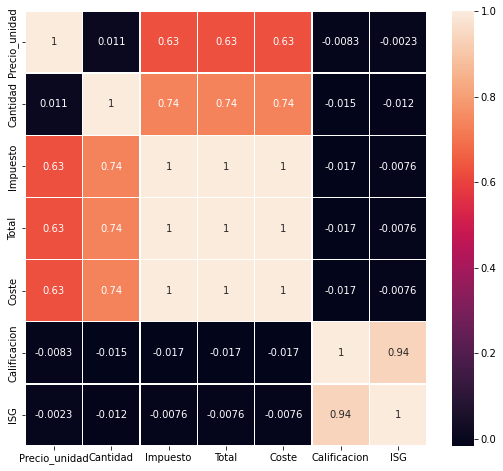

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

In [ ]:
corr_matrix.style.background_gradient(cmap='Blues')

Las variables Impuesto, Total y Coste mantienen, como no podía ser de otro modo, una dependencia absoluta la una de la otra, son variables dependientes la una de la otra.

## <font color="#333F49">**Análisis descriptivo:** <font><font color="#0A66C2"><h10>**Variables cualitativas** <font>

In [ ]:
df.select_dtypes(include=["object"]).describe().T

count unique                  top freq
Factura         1000   1000          635-40-6220    1
Ciudad          1000      3               Yangon  340
Tipo_cliente    1000      2              Miembro  501
Genero          1000      2                Mujer  501
Linea_producto  1000      6  Fashion accessories  178
Forma_pago      1000      3              Ewallet  345
Dia             1000      7             Saturday  164
Jornada         1000      2              Laboral  825
Horario         1000      3               Mañana  383
Calificacion2   1000      3          Detractores  407

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. 

Al analizar los valores únicos y en el proceso de definición de las nuevas variables, se ha realizado este análisis, no detectándose variables categóricas con pocas observaciones.

## <font color="#333F49">**Visualizar EDA con Pandas Profiling** <font>

### Actualizar el módulo de Pandas Profiling

In [ ]:
!pip install -U pandas-profiling

### Habilitar el módulo Pandas Profiling

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Generar el reporte

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Análisis previos:**  <font color="#0A66C2"><h10>**outliers** <font>

## <font color="#333F49">**Outliers en función de la  media** <font>

In [ ]:
dfout1=df.select_dtypes(include=['float64', 'int'])

In [ ]:
dfout1

Precio_unidad  Cantidad  Impuesto      Total   Coste  Calificacion  ISG
0            74.69         7   26.1415   548.9715  522.83           9.1  100
1            15.28         5    3.8200    80.2200   76.40           9.6  100
2            46.33         7   16.2155   340.5255  324.31           7.4    0
3            58.22         8   23.2880   489.0480  465.76           8.4    0
4            86.31         7   30.2085   634.3785  604.17           5.3 -100
..             ...       ...       ...        ...     ...           ...  ...
995          40.35         1    2.0175    42.3675   40.35           6.2 -100
996          97.38        10   48.6900  1022.4900  973.80           4.4 -100
997          31.84         1    1.5920    33.4320   31.84           7.7    0
998          65.82         1    3.2910    69.1110   65.82           4.1 -100
999          88.34         7   30.9190   649.2990  618.38           6.6    0

[1000 rows x 7 columns]

In [ ]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)




In [ ]:
datos=dfout1.apply(outliers_z_score)
datos

Precio_unidad Cantidad Impuesto Total Coste Calificacion ISG
0            []       []       []    []    []           []  []

## <font color="#333F49">**Outliers en función de la  mediana (DAM / MAD)** <font>

Una **estimación basada** en la desviación absoluta mediana (la mediana de la diferencia absoluta entre cada valor de los datos y la mediana muestral)

Iglewicz and Hoaglin (1993) sugieren que cualquier valor de los datos para el cual |Mi | sea mayor que 3.5 se etiquete como un valor atípico.

In [ ]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [ ]:
datos_mad=dfout1.apply(outliers_modified_z_score)
datos_mad

Precio_unidad Cantidad Impuesto Total Coste Calificacion ISG
0            []       []       []    []    []           []  []

## **Outliers:**  <font color="#0A66C2"><h10>**PyCaret** <font>

### <font color="#333F49">**Configurar el entorno** <font>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.anomaly import *

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Factura         1000 non-null   object        
 1   Ciudad          1000 non-null   object        
 2   Tipo_cliente    1000 non-null   object        
 3   Genero          1000 non-null   object        
 4   Linea_producto  1000 non-null   object        
 5   Precio_unidad   1000 non-null   float64       
 6   Cantidad        1000 non-null   int64         
 7   Impuesto        1000 non-null   float64       
 8   Total           1000 non-null   float64       
 9   Forma_pago      1000 non-null   object        
 10  Coste           1000 non-null   float64       
 11  Calificacion    1000 non-null   float64       
 12  Fecha2          1000 non-null   datetime64[ns]
 13  Dia             1000 non-null   object        
 14  Jornada         1000 non-null   object        
 15  Horar

In [ ]:
s = setup(data = df,
          session_id = 123,
          ignore_features = ['Factura','Fecha2', 'Calificacion2', 'ISG'],
          categorical_features =['Ciudad', 'Tipo_cliente', 'Genero', 'Linea_producto','Forma_pago', 'Jornada', 'Horario'],
          numeric_features = ['Cantidad'],
          normalize = True,
          normalize_method = 'zscore',
          remove_multicollinearity = True, 
          multicollinearity_threshold = 0.75,
          remove_perfect_collinearity = True)

Description                 Value
0                               session_id                   123
1                            Original Data            (1000, 18)
2                           Missing Values                 False
3                         Numeric Features                     6
4                     Categorical Features                     8
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (1000, 28)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  1b35
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                  True
35             Multicollinearity Threshold                  0.75
36             Remove Perfect Collinearity                  True
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
get_config ('X').columns

Index(['Precio_unidad', 'Cantidad', 'Total', 'Calificacion', 'Ciudad_Mandalay',
       'Ciudad_Naypyitaw', 'Ciudad_Yangon', 'Tipo_cliente_Normal',
       'Genero_Mujer', 'Linea_producto_Electronic accessories',
       'Linea_producto_Fashion accessories',
       'Linea_producto_Food and beverages', 'Linea_producto_Health and beauty',
       'Linea_producto_Home and lifestyle', 'Linea_producto_Sports and travel',
       'Forma_pago_Cash', 'Forma_pago_Credit card', 'Forma_pago_Ewallet',
       'Dia_Friday', 'Dia_Monday', 'Dia_Saturday', 'Dia_Sunday',
       'Dia_Thursday', 'Dia_Tuesday', 'Dia_Wednesday', 'Horario_Mañana',
       'Horario_Noche', 'Horario_Tarde'],
      dtype='object')

### <font color="#333F49">**Creación del modelo** <font>

In [ ]:
iforest = create_model('iforest',
                       fraction = 0.05)

In [ ]:
r = assign_model(iforest)
r

Factura     Ciudad Tipo_cliente  ...  ISG Anomaly  Anomaly_Score
0    750-67-8428     Yangon      Miembro  ...  100       0      -0.014667
1    226-31-3081  Naypyitaw       Normal  ...  100       0      -0.032525
2    631-41-3108     Yangon       Normal  ...    0       0      -0.038840
3    123-19-1176     Yangon      Miembro  ...    0       0      -0.021886
4    373-73-7910     Yangon       Normal  ... -100       0      -0.022366
..           ...        ...          ...  ...  ...     ...            ...
995  233-67-5758  Naypyitaw       Normal  ... -100       0      -0.014791
996  303-96-2227   Mandalay       Normal  ... -100       1       0.014024
997  727-02-1313     Yangon      Miembro  ...    0       0      -0.020998
998  347-56-2442     Yangon       Normal  ... -100       0      -0.006976
999  849-09-3807     Yangon      Miembro  ...    0       0      -0.029389

[1000 rows x 20 columns]

In [ ]:
r['Anomaly'].sum ()

50

### <font color="#333F49">**Guardar el modelo** <font>

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from google.colab import files
r.to_csv('Anomaly_tarea_02.csv') 

In [ ]:
files.download('Anomaly_tarea_02.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
save_model (iforest,'/content/Anomaly_tarea_02_iforest')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Ciudad',
                                                             'Tipo_cliente',
                                                             'Genero',
                                                             'Linea_producto',
                                                             'Forma_pago',
                                                             'Jornada',
                                                             'Horario'],
                                       display_types=True,
                                       features_todrop=['Factura', 'Fecha2',
                                                        'Calificacion2', 'ISG'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Cantidad'],
                                       target='UNSUPERVISED_DUM

In [ ]:
files.download('Anomaly_tarea_02_iforest.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Conclusiones**: <font color="#0A66C2"><h10>**Primeras áreas de mejora detectadas** <font> 


El Ánalisis Explotario de los datos nos marca algunas consideraciones a tener en cuenta cara a la implementación de futuras acciones.

<font color="#0A66C2"><h10>**Destacamos a nivel de perfil de cliente, clienta como:** <font>

- **Presencia similar de clientes por ciudad.** 

- **Equilibrio entre clientes, clientas con tarjeta de fidelización y sin tarjeta.** 

- **El 50,1% de las observaciones son mujeres y el 49,9% son hombres.**  

- **Sábado y martes son los días de la semana con una mayor concentración de clientes, clientas.** El lunes y domingo se detecta una menor afluencia de clientes, clientas

- **Calidad de los datos.**  
Revisar los procesos de obtención de datos para este tipo de campañas. **El hecho que haya variables con la misma información implica la necesidad de definir de nuevo las variables de información sobre las que debemos volcar los datos**. Por otro lado, llama la atención que pese a tener clientes con la tarjeta de fidelización de los establecimientos, la mitad, no podamos saber en estos tres meses cuántas veces nos han comprado.

<font color="#0A66C2"><h10>**Datos observados antes de definir los modelos de clasificación:** <font>

- **El fin de semana concentra el ticket medio más alto.** Sábado (342,20) y domingo con (334,27).

- **El miércoles y el jueves son los días donde la experiencia de compra de los y las clientas es menos entusiasta.** 


- **El cliente, clienta con tarjeta de fidelización, de media se gasta un 3% más.** Determinar si los esfuerzos, recursos empleados en manatener el programa de fidelización de los y las clientas compensa ese 3% de tickect. En este sentido, en el paso por caja ser más proactivos con el programa, tarjeta de fidelización. Hacer cómoda su titularidad, no demandando la tarjeta física como tal, siendo el número de teléfono móvil suficiente para identificarse. 


- **Los y las clientas menos entusiastas se gastan, de media, más.** Resulta paradójico que quien menos satisfecho, satisfecha está, si tomamos el ticket medio como un indicador de vinculación con los supermercados, esté más "vinculado". Sería oportuno medir el impacto de nuestra política de precios, descuentos y otros indicadores como la cercanía física de nuestros establecimientos. De todos modos, al hilo de lo ya comentado, de estos clientes, clientas no sabemos cuántos han repetido en estos tres meses, cuál es la frecuencia de compra en nuestros establecimientos.

- **Naypyitaw es el establecimiento donde se detecta mayor gasto medio.** Un 5,4% más que en Mandalay y un 7,9% más que en Yangon. La experiencia del cliente, clienta con nuestros supermercados es menos vinculante en Mandalay.

- **Conectamos mejor con las mujeres.** Se gastan más en nuestros supermercados y se manifiestan menos críticas que los hombres.

- **La tarde es el momento donde obtenemos un ticket medio más elevado.** No obstante, en la tarde también hay clientes, clientas menos estusiastas, satisfechas con la experiencia de compra en nuestros establecimientos.

### <font color="#0A66C2"><h10>**En definitiva, entendemos que realizar una segmentación de clientes inicial, cara a detectar patrones, resulta conviniente como punto de partida para acernarnos al perfil de nuestros clientes y clientas** <font> 